In [1]:
push!(LOAD_PATH, pwd())

using SpinBodies, MBTrees;

In [2]:
using PyPlot

In [3]:
max_steps = 1e6
frameskip = 200

N = 50
T = 0.1;

In [4]:
init_lattice = SpinLattice(N, T);

In [5]:
function animate_freeman(;fast=false)
    lattice = copy(init_lattice)
    tree = build_tree(lattice)
    fig, axs = PyPlot.subplots(1,2)
    Es = []
    Ms = []
    steps = []
    while lattice.steps < max_steps
        freeman_step!(lattice, tree, fast=fast)
        if lattice.steps % frameskip == 0
            update_lattice!(lattice)
            push!(Es, lattice.E)
            push!(Ms, lattice.M)
            push!(steps, lattice.steps)
            vis = visualize(lattice)
            axs[1].cla()
            axs[1].matshow(vis)
            axs[2].cla()
            axs[2].plot(steps, Es)
            axs[2].plot(steps, Ms)
            axs[2].legend(["avg E", "avg M"])
            display(fig)
            PyPlot.pause(0.0001)
            IJulia.clear_output(true)
        end
    end
end

animate_freeman (generic function with 1 method)

In [6]:
function animate_metropolis(;fast=false)
    lattice = copy(init_lattice)
    fig, axs = PyPlot.subplots(1,2)
    Es = []
    Ms = []
    steps = []
    while lattice.steps < max_steps
        metropolis_step!(lattice, fast=fast)
        if lattice.steps % frameskip == 0
            update_lattice!(lattice)
            push!(Es, lattice.E)
            push!(Ms, lattice.M)
            push!(steps, lattice.steps)
            vis = visualize(lattice)
            axs[1].cla()
            axs[1].matshow(vis)
            axs[2].cla()
            axs[2].plot(steps, Es)
            axs[2].plot(steps, Ms)
            axs[2].legend(["avg E", "avg M"])
            display(fig)
            PyPlot.pause(0.0001)
            IJulia.clear_output(true)
        end
    end
end

animate_metropolis (generic function with 1 method)

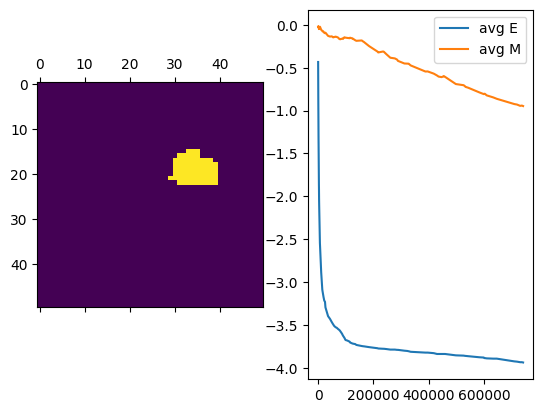

In [8]:
animate_freeman()